In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
!pip3 install ace_tools

ERROR: Could not find a version that satisfies the requirement ace_tools (from versions: none)
ERROR: No matching distribution found for ace_tools


In [19]:
data = pd.read_csv("2018-2019_Daily_Attendance_20240429.csv")
data.head()

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,20180905,172,19,153,0
1,01M015,20180906,171,17,154,0
2,01M015,20180907,172,14,158,0
3,01M015,20180912,173,7,166,0
4,01M015,20180913,173,9,164,0


In [21]:
data["Date"] = pd.to_datetime(data['Date'], format="%Y%m%d")
data.head(1)

,School DBN,Date,Enrolled,Absent,Present,Released
0,01M015,2018-09-05,172,19,153,0


In [26]:
#Summary statistics in order to understand the data better
summary_stats = data.describe()
print(summary_stats)

                                Date      Enrolled         Absent  \
count                         277153  277153.00000  277153.000000   
mean   2019-01-28 12:18:24.343088128     596.98617      50.503538   
min              2018-09-04 00:00:00       1.00000       0.000000   
25%              2018-11-13 00:00:00     329.00000      23.000000   
50%              2019-01-29 00:00:00     476.00000      38.000000   
75%              2019-04-10 00:00:00     684.00000      59.000000   
max              2019-06-26 00:00:00    5955.00000    2151.000000   
std                              NaN     482.90966      54.329671   

             Present       Released  
count  277153.000000  277153.000000  
mean      544.499403       1.983229  
min         1.000000       0.000000  
25%       291.000000       0.000000  
50%       430.000000       0.000000  
75%       640.000000       0.000000  
max      5847.000000    5904.000000  
std       452.970313      35.114511  


In [32]:
data["Absentee Rate"] = data["Absent"] / data["Enrolled"]
data["Absentee Rate"].describe()

count    277153.000000
mean          9.883084
std           8.687548
min           0.000000
25%           4.826863
50%           7.327001
75%          11.632653
max          99.675325
Name: Absentee Rate, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x128e8b5f0>,
 'caps': [<matplotlib.lines.Line2D at 0x128e8bad0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x128e8b2c0>],
 'medians': [<matplotlib.lines.Line2D at 0x128e8c110>],
 'fliers': [<matplotlib.lines.Line2D at 0x128e8c3e0>],
 'means': []}

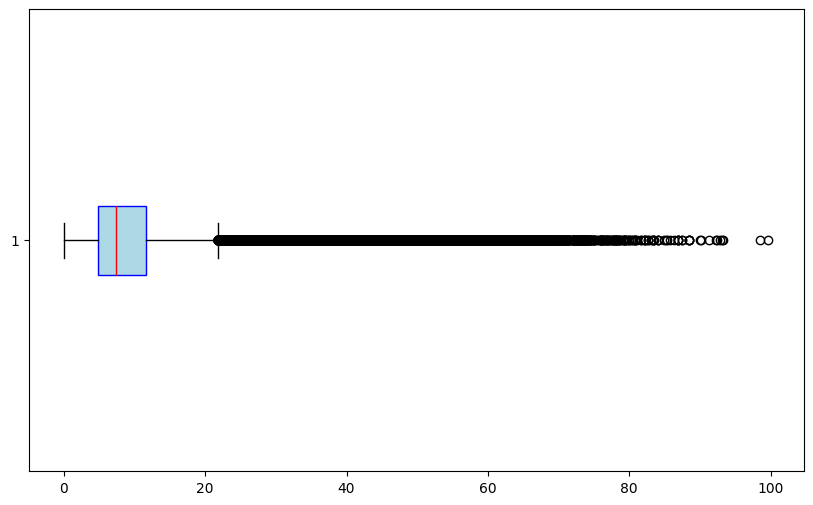

In [35]:
plt.figure(figsize = (10, 6))
plt.boxplot(data["Absentee Rate"], vert=False, patch_artist=True, boxprops=dict(facecolor="lightblue", color="blue"), medianprops=dict(color="red"))

We can see that there are outliers which indicate days with exceptionally high absentee rates

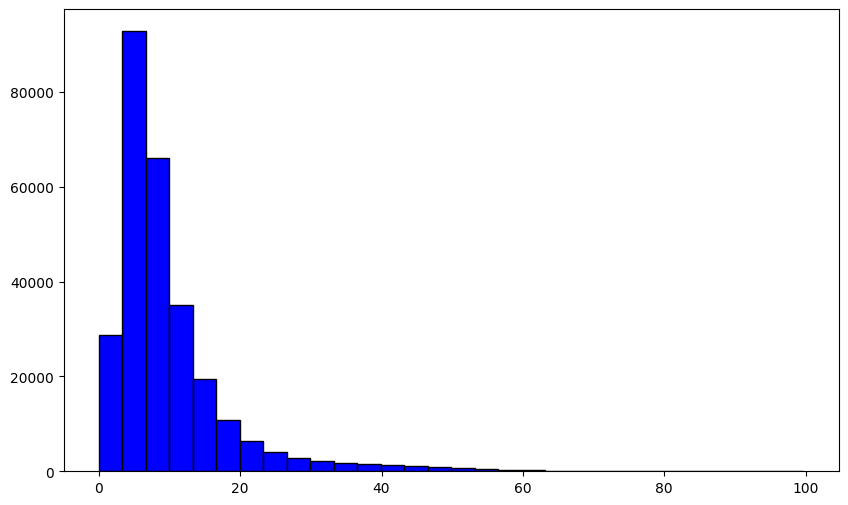

In [39]:
plt.figure(figsize = (10,6))
plt.hist(data["Absentee Rate"], bins=30, color="blue", edgecolor="black")
plt.show()

In [63]:
data[data["School DBN"] == "01M015"]

,School DBN,Date,Enrolled,Absent,Present,Released,Absentee Rate,Month
0,01M015,2018-09-05,172,19,153,0,11.046512,9
1,01M015,2018-09-06,171,17,154,0,9.941520,9
2,01M015,2018-09-07,172,14,158,0,8.139535,9
3,01M015,2018-09-12,173,7,166,0,4.046243,9
4,01M015,2018-09-13,173,9,164,0,5.202312,9
...,...,...,...,...,...,...,...,...
173,01M015,2019-06-20,174,21,153,0,12.068966,6
174,01M015,2019-06-21,174,27,147,0,15.517241,6
175,01M015,2019-06-24,174,21,153,0,12.068966,6
176,01M015,2019-06-25,174,37,137,0,21.264368,6


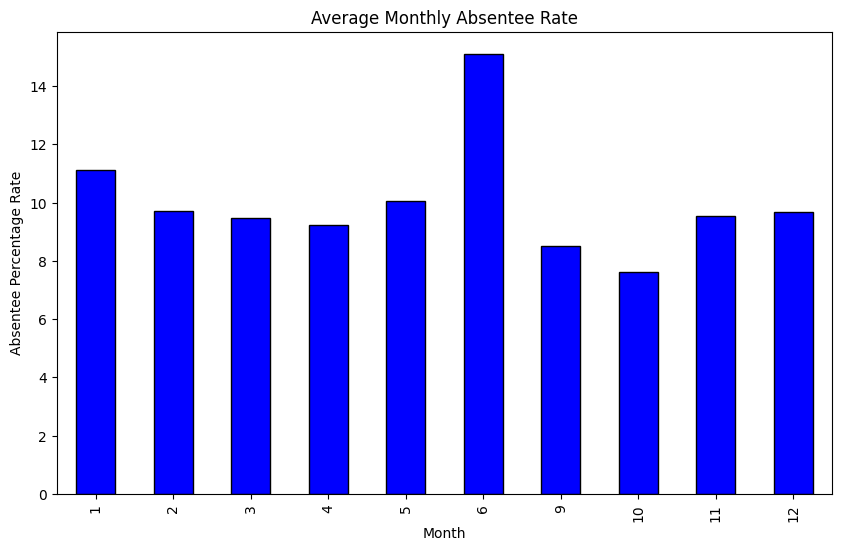

In [46]:
monthly_avg_absentee_rate = data.groupby("Month")["Absentee Rate"].mean()

plt.figure(figsize=(10,6))
monthly_avg_absentee_rate.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel("Month")
plt.ylabel("Absentee Percentage Rate")
plt.title("Average Monthly Absentee Rate")
plt.show()

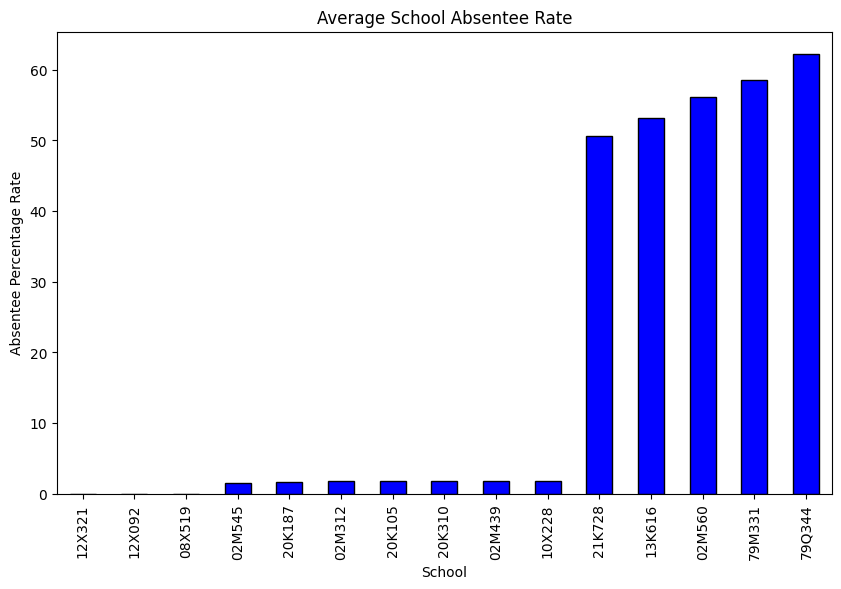

In [49]:
average_absente_rate_school = data.groupby("School DBN")["Absentee Rate"].mean().sort_values()
top_10 = average_absente_rate_school.head(10)
bottom_10 = average_absente_rate_school.tail()
top_bottom_20 = pd.concat([top_10, bottom_10])
plt.figure(figsize=(10,6))
top_bottom_20.plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel("School")
plt.ylabel("Absentee Percentage Rate")
plt.title("Average School Absentee Rate")
plt.show()

In [62]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the weather website (e.g., a historical weather data page)
url = 'https://www.wunderground.com/history/daily/us/ny/new-york-city/KLGA/date/2023-01-01'

# Function to fetch weather data for a specific date
def fetch_weather_data(date):
    response = requests.get(url.replace('2023-01-01', date))
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find the relevant elements containing the weather data
    temp_elements = soup.find_all('span', class_='wu-value wu-value-to')
    
    # Extract the data (this is just an example; the actual extraction depends on the website's structure)
    temps = [temp_element.get_text() for temp_element in temp_elements[:2]]  # Assuming two elements for min and max temp
    
    # Return the data as a dictionary
    return {
        'Date': date,
        'Min Temp': temps[0] if len(temps) > 0 else None,
        'Max Temp': temps[1] if len(temps) > 1 else None
    }

# Dates to fetch data for
dates = pd.date_range(start='2018-09-05', end='2019-06-26').strftime('%Y-%m-%d')

# Fetch weather data for each date
weather_data = []
for date in dates:
    weather_data.append(fetch_weather_data(date))

# Convert the data into a DataFrame
weather_df = pd.DataFrame(weather_data)

# Display the DataFrame
print(weather_df)


           Date Min Temp Max Temp
0    2018-09-05       65       72
1    2018-09-06       65       72
2    2018-09-07       65       72
3    2018-09-08       65       72
4    2018-09-09       65       72
..          ...      ...      ...
290  2019-06-22       69       72
291  2019-06-23       69       72
292  2019-06-24       69       72
293  2019-06-25       69       72
294  2019-06-26       69       72

[295 rows x 3 columns]


In [51]:
high_absentee_rate_schools = data[data["Absentee Rate"] > 50]["School DBN"].unique()
print(high_absentee_rate_schools)

['01M034' '01M064' '01M134' '01M188' '01M458' '01M509' '01M515' '01M650'
 '02M280' '02M288' '02M296' '02M298' '02M303' '02M305' '02M308' '02M313'
 '02M316' '02M374' '02M393' '02M400' '02M412' '02M414' '02M419' '02M425'
 '02M427' '02M432' '02M437' '02M500' '02M520' '02M529' '02M533' '02M543'
 '02M544' '02M550' '02M551' '02M560' '02M570' '02M575' '02M586' '02M655'
 '03M242' '03M299' '03M307' '03M403' '03M404' '03M494' '03M505' '04M007'
 '04M038' '04M102' '04M310' '04M375' '04M680' '05M036' '05M092' '05M123'
 '05M148' '05M154' '05M157' '05M161' '05M200' '05M285' '05M286' '05M304'
 '05M318' '05M369' '06M005' '06M098' '06M211' '06M423' '06M462' '06M467'
 '06M540' '07X151' '07X161' '07X224' '07X277' '07X298' '07X379' '07X381'
 '07X427' '07X473' '07X495' '07X522' '07X527' '07X548' '07X551' '07X557'
 '07X584' '08X048' '08X107' '08X282' '08X293' '08X312' '08X320' '08X349'
 '08X376' '08X377' '08X405' '08X432' '08X467' '08X530' '08X537' '08X558'
 '08X559' '08X561' '09X022' '09X053' '09X058' '09X2

In [53]:
school_record_counts = data["School DBN"].value_counts()
high_ab_rate_sc_counts = school_record_counts[high_absentee_rate_schools]
print(school_record_counts)

School DBN
79X695    179
21K690    179
10X225    179
07X221    179
07X223    179
         ... 
30Q450    166
24Q744    165
12X321     22
08X519      1
12X092      1
Name: count, Length: 1583, dtype: int64


In [56]:
sufficient_data_schools = school_record_counts[school_record_counts>150].index
filtered_attendance_data = data[data["School DBN"].isin(sufficient_data_schools)]

array([179, 178, 177, 176, 175, 174, 173, 172, 171, 170, 169, 168, 167,
       166, 165])

In [57]:
filtered_attendance_data["Day"] = filtered_attendance_data["Date"].dt.day_name()
filtered_attendance_data.head()

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_33221/679115703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_attendance_data["Day"] = filtered_attendance_data["Date"].dt.day_name()


,School DBN,Date,Enrolled,Absent,Present,Released,Absentee Rate,Month,Day
0,01M015,2018-09-05,172,19,153,0,11.046512,9,Wednesday
1,01M015,2018-09-06,171,17,154,0,9.941520,9,Thursday
2,01M015,2018-09-07,172,14,158,0,8.139535,9,Friday
3,01M015,2018-09-12,173,7,166,0,4.046243,9,Wednesday
4,01M015,2018-09-13,173,9,164,0,5.202312,9,Thursday


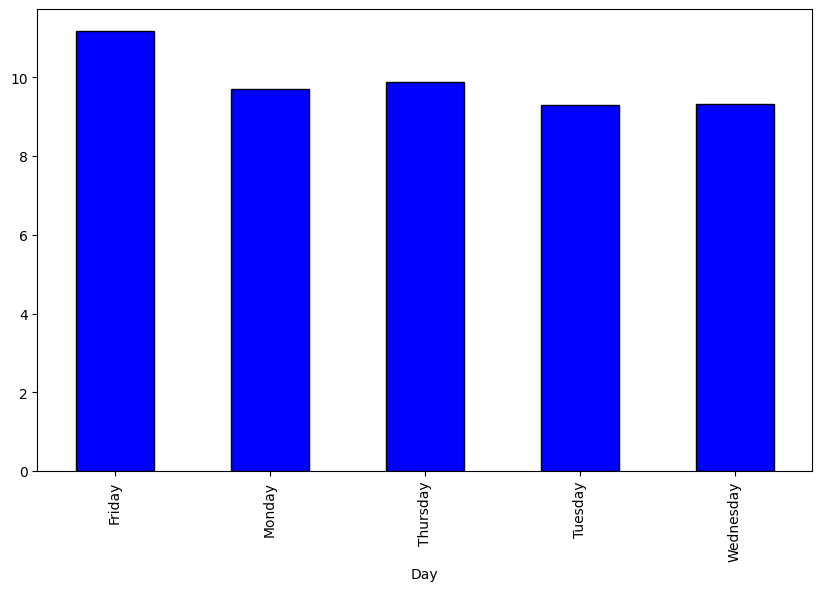

In [60]:
daily_average_absentee_rate = filtered_attendance_data.groupby("Day")["Absentee Rate"].mean()

plt.figure(figsize=(10,6))
daily_average_absentee_rate.plot(kind='bar', color='blue', edgecolor='black')
plt.show()

In [75]:
weather_df = pd.DataFrame(weather_data)
weather_df["Date"] = pd.to_datetime(weather_df["Date"])
merged_data = pd.merge(filtered_attendance_data, weather_df, how="left", on="Date")
merged_data.tail()

,School DBN,Date,Enrolled,Absent,Present,Released,Absentee Rate,Month,Day,Min Temp,Max Temp
277124,79X695,2019-06-20,230,46,136,48,20.000000,6,Thursday,69,72
277125,79X695,2019-06-21,226,53,128,45,23.451327,6,Friday,69,72
277126,79X695,2019-06-24,226,42,130,54,18.584071,6,Monday,69,72
277127,79X695,2019-06-25,226,56,127,43,24.778761,6,Tuesday,69,72
277128,79X695,2019-06-26,216,27,68,121,12.500000,6,Wednesday,69,72


In [84]:
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import pandas as pd
import time

# API base URL and your API key
api_base_url = 'https://api.weather.com/v1/location/KLGA:9:US/observations/historical.json'
api_key = 'e1f10a1e78da46f5b10a1e78da96f525'  # Your actual API key

# Configure the retry strategy
retry_strategy = Retry(
    total=5,
    status_forcelist=[429, 500, 502, 503, 504],
    allowed_methods=["HEAD", "GET", "OPTIONS"],
    backoff_factor=1
)

adapter = HTTPAdapter(max_retries=retry_strategy)
http = requests.Session()
http.mount("https://", adapter)
http.mount("http://", adapter)

# Function to fetch weather data for a specific date using the API
def fetch_weather_data(date):
    params = {
        'apiKey': api_key,
        'units': 'e',
        'startDate': date,
        'endDate': date
    }
    try:
        response = http.get(api_base_url, params=params)
        response.raise_for_status()
        data = response.json()
        
        # Extract precipitation data from the response
        precip_total = None
        if 'observations' in data and len(data['observations']) > 0:
            # Sum up all hourly precipitation values for the date
            precip_total = sum(obs['precip_hrly'] for obs in data['observations'] if 'precip_hrly' in obs)
        
        return {
            'Date': date,
            'Precipitation': precip_total
        }
    except requests.exceptions.RequestException as e:
        print(f"An error occurred for date {date}: {e}")
        return {
            'Date': date,
            'Precipitation': None
        }

# Dates to fetch data for (assuming your dataset dates range)
dates = pd.date_range(start='2018-09-05', end='2019-06-26').strftime('%Y%m%d')  # Format dates as YYYYMMDD

# Fetch weather data for each date
weather_data = []
for date in dates:
    weather_data.append(fetch_weather_data(date))
    time.sleep(2)  # Add a 2-second delay between requests

# Convert the weather data into a DataFrame
weather_df = pd.DataFrame(weather_data)

# Ensure the Date column is in datetime format
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%Y%m%d')




In [87]:
merged_data = pd.merge(filtered_attendance_data, weather_df, how="left", on="Date")
merged_data.head()

,School DBN,Date,Enrolled,Absent,Present,Released,Absentee Rate,Month,Day,Precipitation
0,01M015,2018-09-05,172,19,153,0,11.046512,9,Wednesday,0.00
1,01M015,2018-09-06,171,17,154,0,9.941520,9,Thursday,0.27
2,01M015,2018-09-07,172,14,158,0,8.139535,9,Friday,0.00
3,01M015,2018-09-12,173,7,166,0,4.046243,9,Wednesday,0.24
4,01M015,2018-09-13,173,9,164,0,5.202312,9,Thursday,0.19


In [89]:
import requests
from requests.adapters import HTTPAdapter
from urllib3.util.retry import Retry
import pandas as pd
import time

# API base URL and your API key
api_base_url = 'https://api.weather.com/v1/location/KLGA:9:US/observations/historical.json'
api_key = 'e1f10a1e78da46f5b10a1e78da96f525'  # Your actual API key

# Configure the retry strategy
retry_strategy = Retry(
    total=5,
    status_forcelist=[429, 500, 502, 503, 504],
    allowed_methods=["HEAD", "GET", "OPTIONS"],
    backoff_factor=1
)

adapter = HTTPAdapter(max_retries=retry_strategy)
http = requests.Session()
http.mount("https://", adapter)
http.mount("http://", adapter)

# Function to fetch weather data for a specific date using the API
def fetch_weather_data(date):
    params = {
        'apiKey': api_key,
        'units': 'e',
        'startDate': date,
        'endDate': date
    }
    try:
        response = http.get(api_base_url, params=params)
        response.raise_for_status()
        data = response.json()
        
        # Extract temperature data from the response
        if 'observations' in data and len(data['observations']) > 0:
            temps = [obs['temp'] for obs in data['observations']]
            high_temp = max(temps) if temps else None
            low_temp = min(temps) if temps else None
        else:
            high_temp = None
            low_temp = None
        
        return {
            'Date': date,
            'High Temp': high_temp,
            'Low Temp': low_temp
        }
    except requests.exceptions.RequestException as e:
        print(f"An error occurred for date {date}: {e}")
        return {
            'Date': date,
            'High Temp': None,
            'Low Temp': None
        }

# Dates to fetch data for
dates = pd.date_range(start='2018-09-05', end='2019-06-26').strftime('%Y%m%d')  # Format dates as YYYYMMDD

# Fetch weather data for each date
weather_data = []
for date in dates:
    weather_data.append(fetch_weather_data(date))
    time.sleep(2)  # Add a 2-second delay between requests

# Convert the weather data into a DataFrame
weather_df = pd.DataFrame(weather_data)

# Ensure the Date column is in datetime format



NameError: name 'temp_df' is not defined

In [90]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%Y%m%d')
weather_df.head()

,Date,High Temp,Low Temp
0,2018-09-05,90,79
1,2018-09-06,96,77
2,2018-09-07,77,72
3,2018-09-08,72,63
4,2018-09-09,65,59


In [91]:
merged_data = pd.merge(merged_data, weather_df, how="left", on="Date")
merged_data

,School DBN,Date,Enrolled,Absent,Present,Released,Absentee Rate,Month,Day,Precipitation,High Temp,Low Temp
0,01M015,2018-09-05,172,19,153,0,11.046512,9,Wednesday,0.00,90.0,79.0
1,01M015,2018-09-06,171,17,154,0,9.941520,9,Thursday,0.27,96.0,77.0
2,01M015,2018-09-07,172,14,158,0,8.139535,9,Friday,0.00,77.0,72.0
3,01M015,2018-09-12,173,7,166,0,4.046243,9,Wednesday,0.24,77.0,72.0
4,01M015,2018-09-13,173,9,164,0,5.202312,9,Thursday,0.19,76.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...
277124,79X695,2019-06-20,230,46,136,48,20.000000,6,Thursday,1.96,78.0,62.0
277125,79X695,2019-06-21,226,53,128,45,23.451327,6,Friday,0.81,77.0,65.0
277126,79X695,2019-06-24,226,42,130,54,18.584071,6,Monday,0.00,86.0,70.0
277127,79X695,2019-06-25,226,56,127,43,24.778761,6,Tuesday,0.68,85.0,73.0


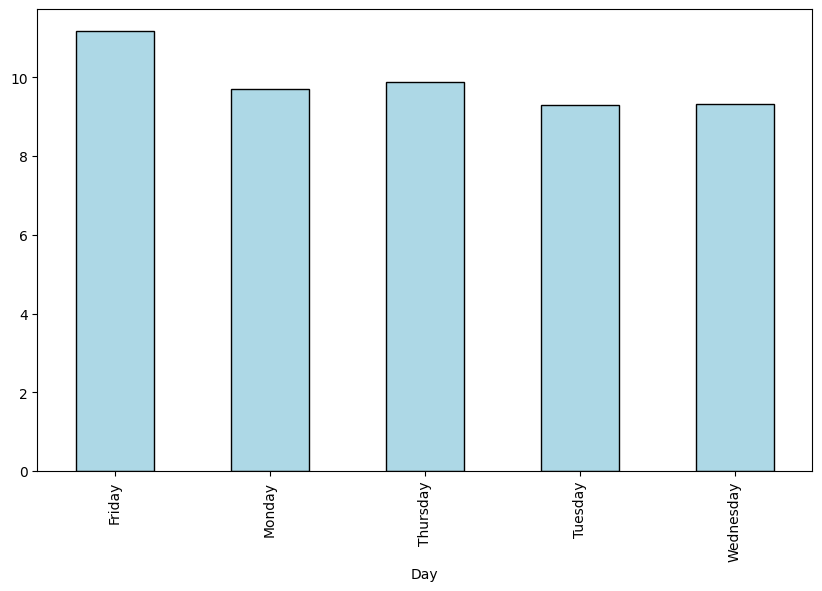

In [92]:
avg_day = merged_data.groupby("Day")["Absentee Rate"].mean()
plt.figure(figsize=(10,6))
avg_day.plot(kind="bar", color="lightblue", edgecolor="black")
plt.show()

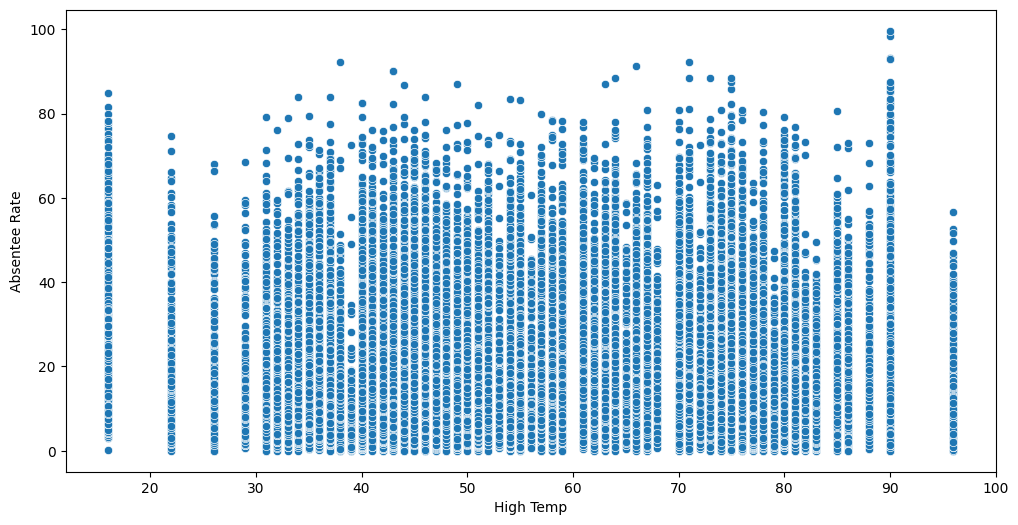

In [93]:
plt.figure(figsize=(12,6))
sns.scatterplot(x="High Temp", y="Absentee Rate", data=merged_data)
plt.show()

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_33221/2521681349.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_absentee_rate = merged_data.groupby('Temp Range')['Absentee Rate'].mean().reset_index()


   Temp Range  Absentee Rate
0       16-20      35.551293
1       21-25      10.306648
2       26-30       9.372051
3       31-35       9.645545
4       36-40      10.170778
5       41-45       9.397860
6       46-50       9.018220
7       51-55       8.953416
8       56-60       9.732472
9       61-65       9.641851
10      66-70       9.177596
11      71-75      10.030613
12      76-80       9.823327
13      81-85      12.134563
14      86-90      15.407554
15      91-95      10.572837


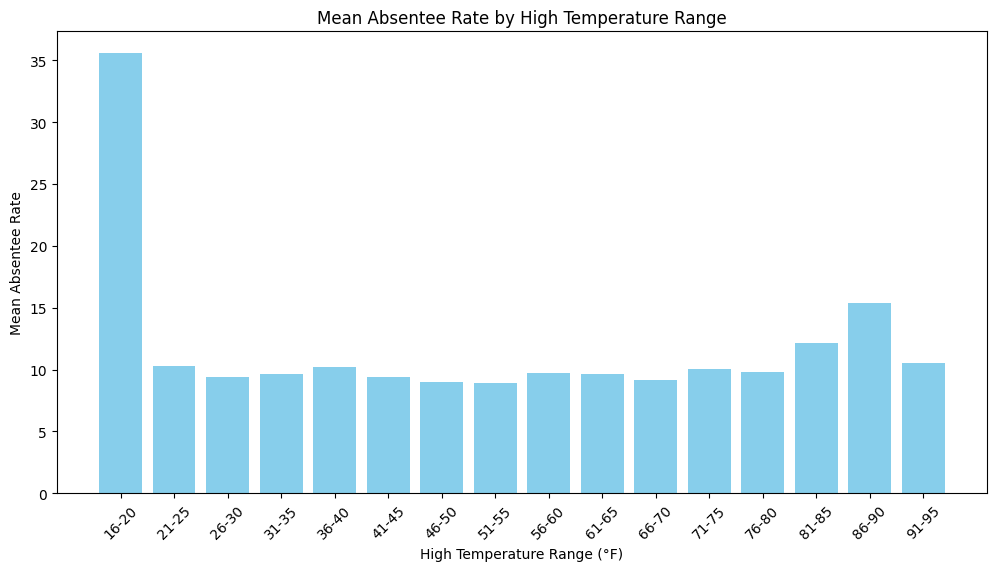

In [95]:
import pandas as pd
import matplotlib.pyplot as plt


# Define the temperature ranges
temp_bins = range(int(merged_data['High Temp'].min()), int(merged_data['High Temp'].max()) + 5, 5)
temp_labels = [f"{temp_bins[i]}-{temp_bins[i+1]-1}" for i in range(len(temp_bins)-1)]

# Bin the high temperatures
merged_data['Temp Range'] = pd.cut(merged_data['High Temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)

# Calculate the mean absentee rate for each temperature range
mean_absentee_rate = merged_data.groupby('Temp Range')['Absentee Rate'].mean().reset_index()

# Display the mean absentee rate
print(mean_absentee_rate)

# Visualize the mean absentee rate for each temperature range
plt.figure(figsize=(12, 6))
plt.bar(mean_absentee_rate['Temp Range'], mean_absentee_rate['Absentee Rate'], color='skyblue')
plt.title('Mean Absentee Rate by High Temperature Range')
plt.xlabel('High Temperature Range (°F)')
plt.ylabel('Mean Absentee Rate')
plt.xticks(rotation=45)
plt.show()


In [100]:
temp_bins = range(int(merged_data['Low Temp'].min()), int(merged_data['Low Temp'].max()) + 5, 5)
temp_labels = [f"{temp_bins[i]}-{temp_bins[i+1] - 1}" for i in range(len(temp_bins)-1)] 
merged_data["Low Temp Range"] = pd.cut(merged_data["Low Temp"], bins=temp_bins, labels=temp_labels, include_lowest=True)

/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_33221/4222714538.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_absentee_rate = merged_data.groupby("Low Temp Range")["Absentee Rate"].mean().reset_index()


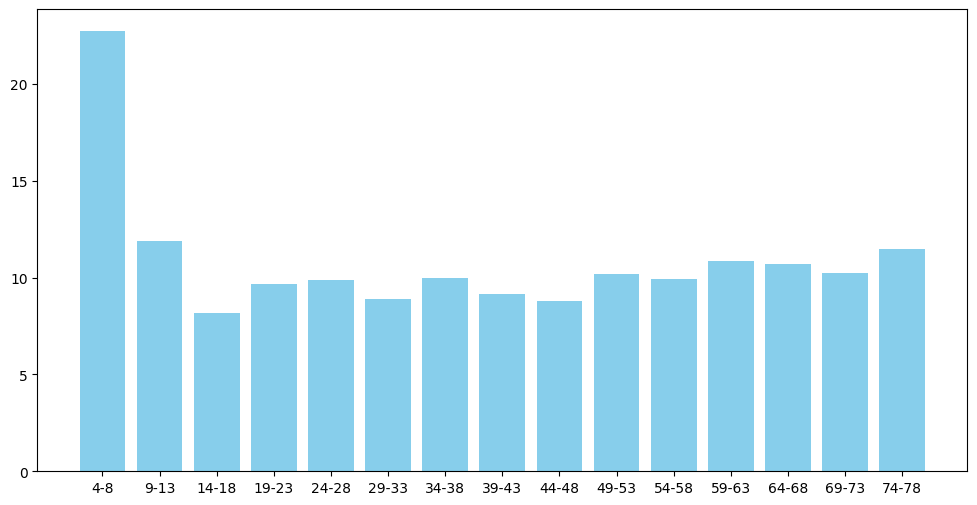

In [103]:
mean_absentee_rate = merged_data.groupby("Low Temp Range")["Absentee Rate"].mean().reset_index()

plt.figure(figsize=(12,6))
plt.bar(mean_absentee_rate["Low Temp Range"], mean_absentee_rate["Absentee Rate"], color="skyblue")
plt.show()

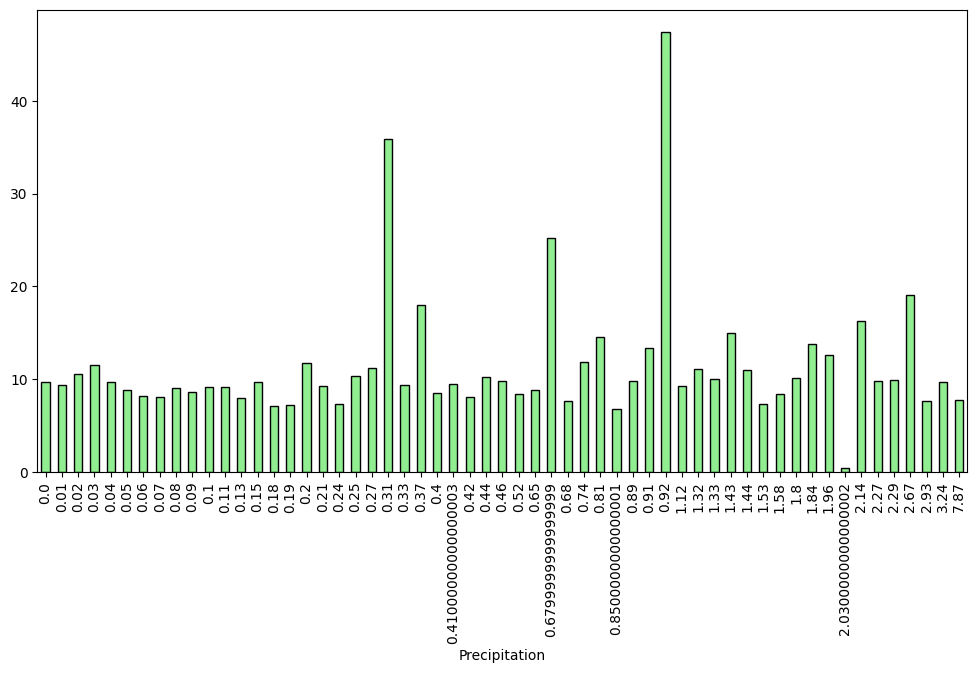

In [109]:
mean_absentee_rate = merged_data.groupby("Precipitation")["Absentee Rate"].mean()

plt.figure(figsize=(12,6))
mean_absentee_rate.plot(kind="bar", color="lightgreen", edgecolor="black")
plt.show()

In [128]:
precip_bins = [round(i * 0.5,2) for i in range(int(merged_data['Precipitation'].max() * 2) + 1)]
precip_labels = [f"{precip_bins[i]}-{precip_bins[i+1]-0.01}" for i in range(len(precip_bins)-1)]
merged_data["Precipitation Range"] = pd.cut(merged_data["Precipitation"], bins=precip_bins, labels=precip_labels, include_lowest=True)
merged_data

,School DBN,Date,Enrolled,Absent,Present,Released,Absentee Rate,Month,Day,Precipitation,High Temp,Low Temp,Temp Range,Low Temp Range,Precipitation Range
0,01M015,2018-09-05,172,19,153,0,11.046512,9,Wednesday,0.00,90.0,79.0,86-90,74-78,0.0-0.49
1,01M015,2018-09-06,171,17,154,0,9.941520,9,Thursday,0.27,96.0,77.0,91-95,74-78,0.0-0.49
2,01M015,2018-09-07,172,14,158,0,8.139535,9,Friday,0.00,77.0,72.0,76-80,69-73,0.0-0.49
3,01M015,2018-09-12,173,7,166,0,4.046243,9,Wednesday,0.24,77.0,72.0,76-80,69-73,0.0-0.49
4,01M015,2018-09-13,173,9,164,0,5.202312,9,Thursday,0.19,76.0,70.0,71-75,69-73,0.0-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277124,79X695,2019-06-20,230,46,136,48,20.000000,6,Thursday,1.96,78.0,62.0,76-80,59-63,1.5-1.99
277125,79X695,2019-06-21,226,53,128,45,23.451327,6,Friday,0.81,77.0,65.0,76-80,64-68,0.5-0.99
277126,79X695,2019-06-24,226,42,130,54,18.584071,6,Monday,0.00,86.0,70.0,81-85,69-73,0.0-0.49
277127,79X695,2019-06-25,226,56,127,43,24.778761,6,Tuesday,0.68,85.0,73.0,81-85,69-73,0.5-0.99


/var/folders/m4/264dj2r17lg_78_882f43dxh0000gn/T/ipykernel_33221/716499070.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_absentee_rate = merged_data.groupby("Precipitation Range")["Absentee Rate"].mean().reset_index()


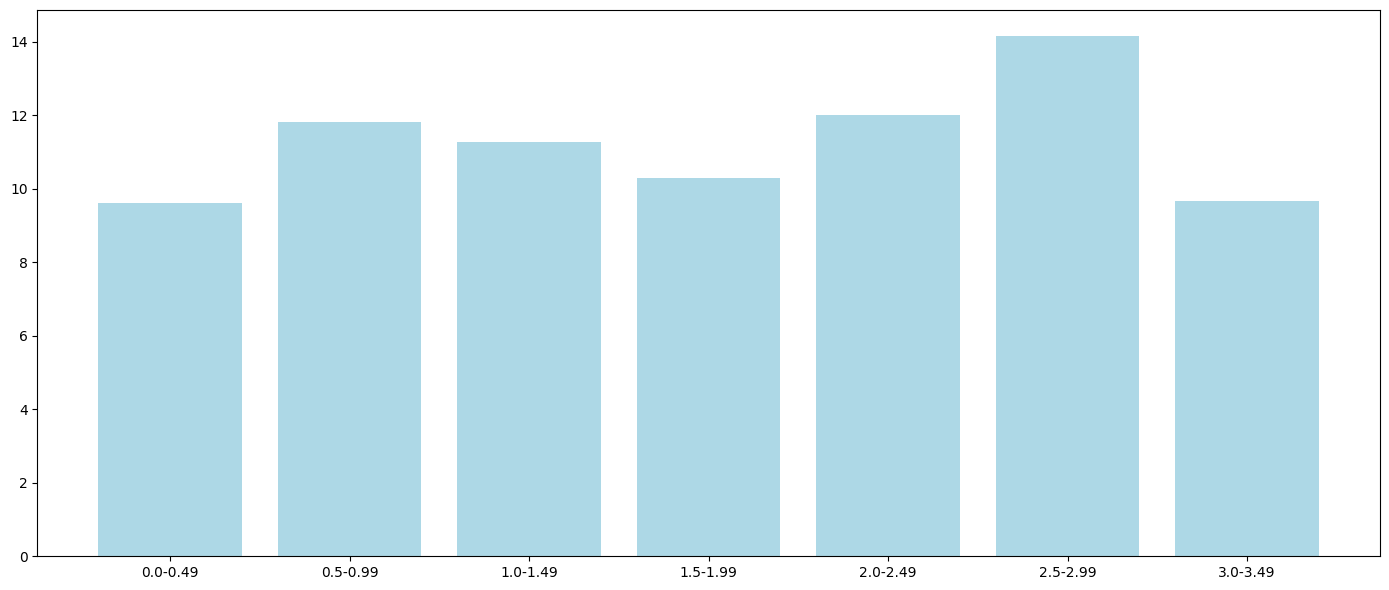

In [130]:
mean_absentee_rate = merged_data.groupby("Precipitation Range")["Absentee Rate"].mean().reset_index()
plt.figure(figsize=(14,6))
plt.bar(mean_absentee_rate["Precipitation Range"], mean_absentee_rate["Absentee Rate"], color="lightblue")
plt.tight_layout()
plt.show()

In [139]:
class Circle(object):
    def __init__ (self, radius, color):
        self.radius = radius
        self.color = color
    def multRadius(self, m):
        self.radius = m * self.radius
c1 = Circle(10, "red")
c1.multRadius(2)
c1.radius

20

In [142]:
def sub(a,b):
    return sum([a,b])
sub(1,2)

3